In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv
/kaggle/input/movie-dataset/Hydra-Movie-Scrape.csv


In [2]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [3]:
train.head()

content_id                              title content_type    genre  \
0      645543             The Surreal Conspiracy  Documentary    Drama   
1      939316           Astro Saga in the Cosmos  Documentary    Drama   
2      280014  Synthesizing the Eternal Artifact        Movie   Action   
3      215181      The Artifact of Savage Zenith        Movie  Romance   
4      241683   Resonating the Spectral Prophecy        Movie    Drama   

    sub_genre  release_year  language country_of_origin content_age_rating  \
0  Historical          2013   Spanish               USA                 PG   
1       Crime          2023  Japanese               USA                 PG   
2      Satire          2000  Japanese               USA                 PG   
3      Satire          2019   English                UK                  G   
4  Historical          1993   Spanish               USA              PG-13   

         budget  ...  completion_rate   total_views  avg_watch_time  \
0  6.744258e+06  ...        85.792005   8067.786265       20.718243   
1  6.178134e+06  ...        80.437724    750.473993       24.262058   
2  1.588919e+07  ...        82.882434  77701.229657       10.776592   
3           NaN  ...        80.022574   4411.172846       11.376984   
4  1.518643e+07  ...        72.209335  11678.765250        6.219910   

        revenue  awards  critic_score  user_engagement_score  marketing_spend  \
0   2835.071735       7     87.991891             110.000000     2.281850e+06   
1    655.016451       4     91.867209              85.750069     1.601333e+06   
2  19516.690216       3     66.761330              90.000000     5.274652e+06   
3   2701.183619       4     58.300367             113.564852     1.815005e+07   
4  16938.114373       1     47.234645              64.426039     4.809484e+06   

   licensing_cost  user_retention  
0     1481.325232    4.910349e+19  
1      195.900521             NaN  
2    15457.226653    4.901917e+23  
3      921.621615    1.672483e+15  
4    15134.227463    2.539603e+08  

[5 rows x 23 columns]

## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

In [4]:
import pandas as pd

# Load the training data
train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")

# Check for missing values
print(train.isnull().sum())

# Review the dataset
print(train.head())

content_id                   0
title                        0
content_type                 0
genre                        0
sub_genre                    0
release_year                 0
language                     0
country_of_origin            0
content_age_rating           0
budget                   40075
runtime                      0
imdb_rating              39934
streamly_rating              0
completion_rate              0
total_views                  0
avg_watch_time               0
revenue                  40081
awards                       0
critic_score             39642
user_engagement_score    40164
marketing_spend              0
licensing_cost               0
user_retention           39921
dtype: int64
   content_id                              title content_type    genre  \
0      645543             The Surreal Conspiracy  Documentary    Drama   
1      939316           Astro Saga in the Cosmos  Documentary    Drama   
2      280014  Synthesizing the Eternal Artifact    

In [5]:
missing_value_columns = ["budget","imdb_rating","revenue","critic_score","user_engagement_score","user_retention"]
temp = train[missing_value_columns]
temp.dtypes

budget                   float64
imdb_rating              float64
revenue                  float64
critic_score             float64
user_engagement_score    float64
user_retention           float64
dtype: object

In [6]:
train.dtypes

content_id                 int64
title                     object
content_type              object
genre                     object
sub_genre                 object
release_year               int64
language                  object
country_of_origin         object
content_age_rating        object
budget                   float64
runtime                  float64
imdb_rating              float64
streamly_rating          float64
completion_rate          float64
total_views              float64
avg_watch_time           float64
revenue                  float64
awards                     int64
critic_score             float64
user_engagement_score    float64
marketing_spend          float64
licensing_cost           float64
user_retention           float64
dtype: object

In [7]:

# we will handle imdb_rating column on our own
def rating_to_category(rating):
    if rating <= 3:
        return 0  # Low
    elif rating <= 6:
        return 1  # Medium
    elif rating <= 8:
        return 2  # Good
    else:
        return 3  # Excellent

train['imdb_category'] = train['imdb_rating'].apply(rating_to_category)

# other all categorical columns are converted to codings
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for columns in categorical_columns :
    if columns != "title" :
        train[columns] = le.fit_transform(train[columns])
    

In [8]:
#Assessing Completeness and Consistency of the Dataset
# Check for missing values
missing_values = train.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Review data types and column structure
print("Data types and column info:\n")
print(train.info())
# see MARKDOWN

Missing values in each column:
 content_id                   0
title                        0
content_type                 0
genre                        0
sub_genre                    0
release_year                 0
language                     0
country_of_origin            0
content_age_rating           0
budget                   40075
runtime                      0
imdb_rating              39934
streamly_rating              0
completion_rate              0
total_views                  0
avg_watch_time               0
revenue                  40081
awards                       0
critic_score             39642
user_engagement_score    40164
marketing_spend              0
licensing_cost               0
user_retention           39921
imdb_category                0
dtype: int64
Data types and column info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------       

Several columns have missing values:

budget (4,075 missing)
imdb_rating (39,934 missing)
revenue (40,081 missing)
critic_score (39,642 missing)
user_engagement_score (40,164 missing)
user_retention (39,921 missing)
These missing values are significant and require treatment before further analysis

In [9]:
train.head()

content_id                              title  content_type  genre  \
0      645543             The Surreal Conspiracy             0      2   
1      939316           Astro Saga in the Cosmos             0      2   
2      280014  Synthesizing the Eternal Artifact             1      0   
3      215181      The Artifact of Savage Zenith             1      3   
4      241683   Resonating the Spectral Prophecy             1      2   

   sub_genre  release_year  language  country_of_origin  content_age_rating  \
0          3          2013         6                  6                   1   
1          1          2023         4                  6                   1   
2          5          2000         4                  6                   1   
3          5          2019         0                  5                   0   
4          3          1993         6                  6                   2   

         budget  ...   total_views  avg_watch_time       revenue  awards  \
0  6.744258e+06  ...   8067.786265       20.718243   2835.071735       7   
1  6.178134e+06  ...    750.473993       24.262058    655.016451       4   
2  1.588919e+07  ...  77701.229657       10.776592  19516.690216       3   
3           NaN  ...   4411.172846       11.376984   2701.183619       4   
4  1.518643e+07  ...  11678.765250        6.219910  16938.114373       1   

   critic_score  user_engagement_score  marketing_spend  licensing_cost  \
0     87.991891             110.000000     2.281850e+06     1481.325232   
1     91.867209              85.750069     1.601333e+06      195.900521   
2     66.761330              90.000000     5.274652e+06    15457.226653   
3     58.300367             113.564852     1.815005e+07      921.621615   
4     47.234645              64.426039     4.809484e+06    15134.227463   

   user_retention  imdb_category  
0    4.910349e+19              3  
1             NaN              2  
2    4.901917e+23              3  
3    1.672483e+15              2  
4    2.539603e+08              1  

[5 rows x 24 columns]

From the output, we can see that several columns have missing values. 
budget: 40,075 missing values
imdb_rating: 39,934 missing values
revenue: 40,081 missing values
critic_score: 39,642 missing values
user_engagement_score: 40,164 missing values
user_retention: 39,921 missing values
Given the large number of missing values (approximately 5% of the dataset), handling these is crucial to avoid biased results.


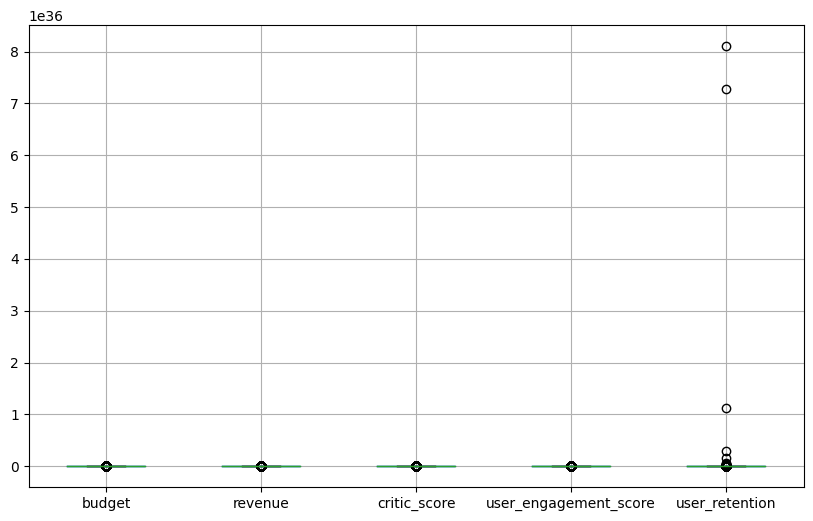

In [10]:
#we will handle missing values for numeric columns
import pandas as pd
import matplotlib.pyplot as plt
numeric_missing_columns = ["budget","revenue","critic_score","user_engagement_score","user_retention"]

#  we will check if this columns have outliers
plt.figure(figsize=(10, 6))
train[numeric_missing_columns].boxplot()
plt.show()

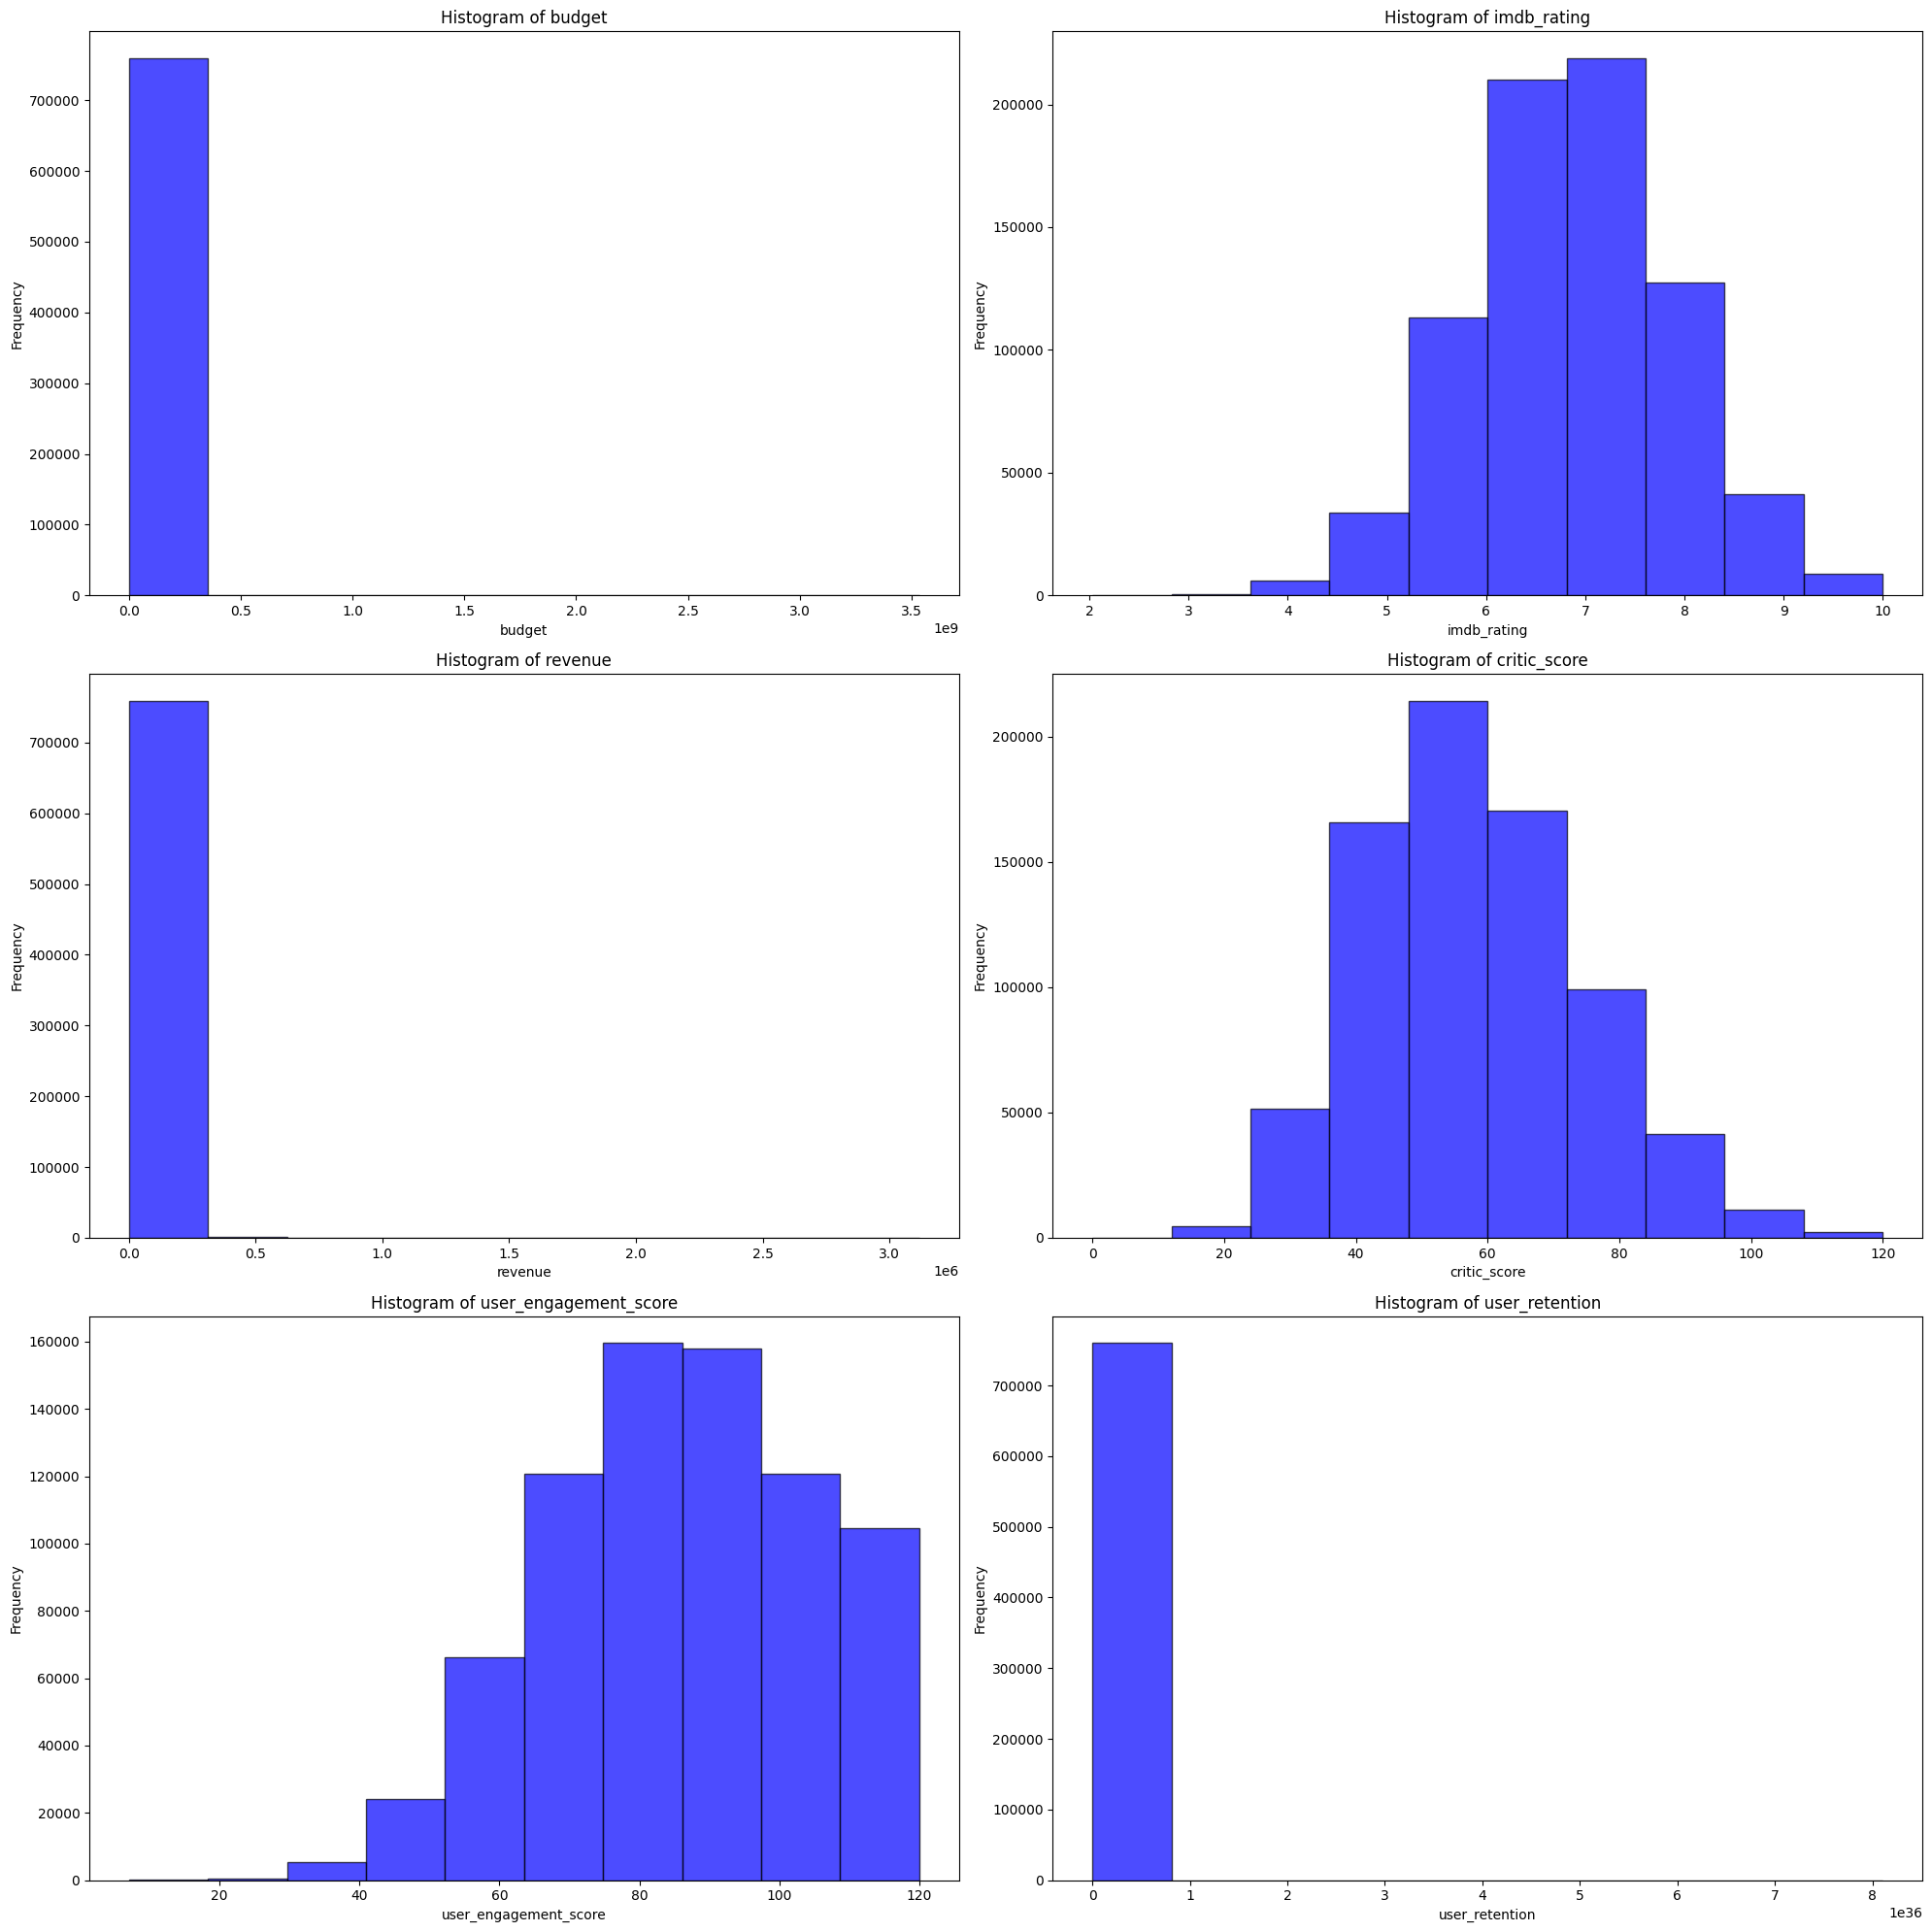

In [11]:
#the distribution of each of these columns
plt.figure(figsize=(20, 20))

for i, col in enumerate(missing_value_columns):
    plt.subplot(3,2, i+1)  # Creates a 2x2 grid of plots
    plt.hist(train[col], bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [12]:
#As revenue, user eneagement score and user retention are highly skewed let them log transform and use meadin to impute missign values

In [13]:
import numpy as np
import pandas as pd

# Assuming 'train' is your DataFrame and 'missing_value_columns' is already defined
for column in ["revenue", "user_engagement_score", "user_retention"]:
    train[column] = np.log1p(train[column])

# Replace missing values with mean for numerical columns (except 'user_retention')
for column in missing_value_columns:
    if column != "user_retention":
        train[column] = train[column].fillna(train[column].mean())

# Replace missing values with median for 'user_retention'
train["user_retention"] = train["user_retention"].fillna(train["user_retention"].median())

# Replace missing values with mode for 'imdb_rating'
train["imdb_rating"] = train["imdb_rating"].fillna(train["imdb_rating"].mode()[0])

# Check for remaining missing values
missing_values = train.isnull().sum()
print(missing_values)


content_id               0
title                    0
content_type             0
genre                    0
sub_genre                0
release_year             0
language                 0
country_of_origin        0
content_age_rating       0
budget                   0
runtime                  0
imdb_rating              0
streamly_rating          0
completion_rate          0
total_views              0
avg_watch_time           0
revenue                  0
awards                   0
critic_score             0
user_engagement_score    0
marketing_spend          0
licensing_cost           0
user_retention           0
imdb_category            0
dtype: int64


THeres no missing values . But we must confirm it by visualisationn methods

In [14]:
# Check for unique values in categorical columns
print("Unique values in categorical columns:\n")
for col in ['content_age_rating', 'genre', 'language', 'country_of_origin']:
    print(f"{col}: {train[col].unique()}")


Unique values in categorical columns:

content_age_rating: [1 0 2 3]
genre: [2 0 3 1 4 5]
language: [6 4 0 2 5 1 3]
country_of_origin: [6 5 1 2 3 0 4]


In [15]:
# let us scale down the user retention
# print(train["user_retention"])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 10))
train['user_retention_scaled'] = scaler.fit_transform(train[['user_retention']])
# Apply to a column
print(train['user_retention_scaled'])

0         5.801569
1         3.701580
2         6.776764
3         4.712132
4         3.049456
            ...   
799995    3.381424
799996    2.856193
799997    2.413336
799998    6.354147
799999    4.038539
Name: user_retention_scaled, Length: 800000, dtype: float64


Scaling Down User Retention Using Min-Max Scaler
We want to scale down the user_retention values to a range between 1 and 10. 
This helps normalize the data for better comparison and model performance.

MinMaxScaler: We use the MinMaxScaler from the sklearn.preprocessing library. 
This scaler transforms values by scaling them to a specified range. 
In our case, we chose the range from 1 to 10.

array([[<Axes: title={'center': 'content_id'}>,
        <Axes: title={'center': 'content_type'}>,
        <Axes: title={'center': 'genre'}>,
        <Axes: title={'center': 'sub_genre'}>,
        <Axes: title={'center': 'release_year'}>],
       [<Axes: title={'center': 'language'}>,
        <Axes: title={'center': 'country_of_origin'}>,
        <Axes: title={'center': 'content_age_rating'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'imdb_rating'}>,
        <Axes: title={'center': 'streamly_rating'}>,
        <Axes: title={'center': 'completion_rate'}>,
        <Axes: title={'center': 'total_views'}>,
        <Axes: title={'center': 'avg_watch_time'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'awards'}>,
        <Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'user_engagement_score'}>,
        <Axes: title={'center': 'marketing_spend'}>],
     

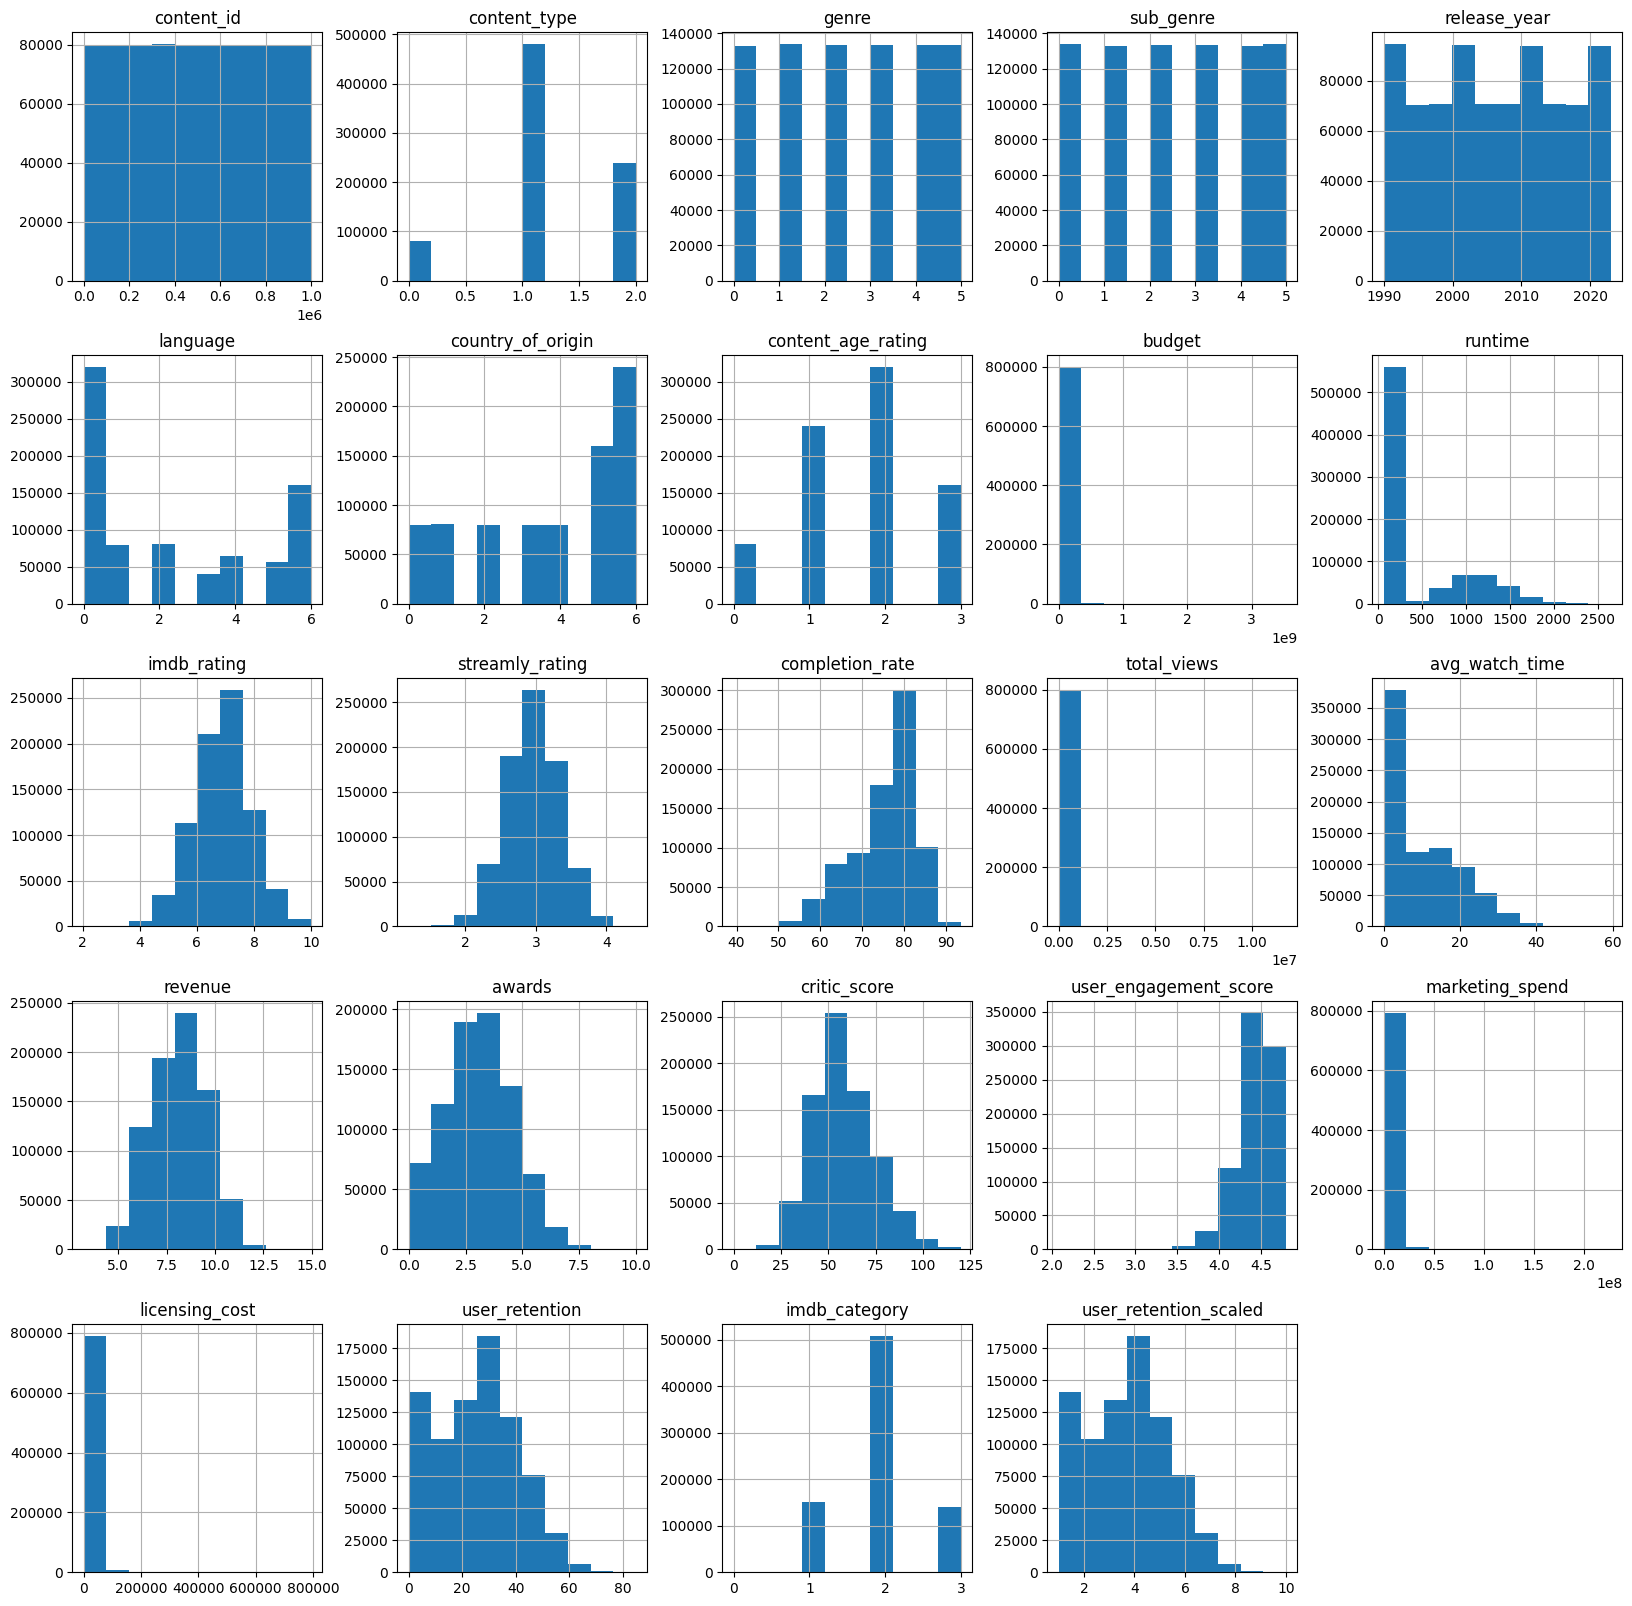

In [16]:
train.hist(figsize = (20,20))

Missing Data: The columns budget, imdb_rating, revenue, critic_score, user_engagement_score, and user_retention have a significant number of missing values. This might require imputation or removing those rows/columns for further analysis.
Also  fpr examples : user_retention has a very high maximum value, indicating potential outliers or incorrect data entries.

array([[<Axes: title={'center': 'content_id'}>,
        <Axes: title={'center': 'content_type'}>,
        <Axes: title={'center': 'genre'}>,
        <Axes: title={'center': 'sub_genre'}>,
        <Axes: title={'center': 'release_year'}>],
       [<Axes: title={'center': 'language'}>,
        <Axes: title={'center': 'country_of_origin'}>,
        <Axes: title={'center': 'content_age_rating'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'imdb_rating'}>,
        <Axes: title={'center': 'streamly_rating'}>,
        <Axes: title={'center': 'completion_rate'}>,
        <Axes: title={'center': 'total_views'}>,
        <Axes: title={'center': 'avg_watch_time'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'awards'}>,
        <Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'user_engagement_score'}>,
        <Axes: title={'center': 'marketing_spend'}>],
     

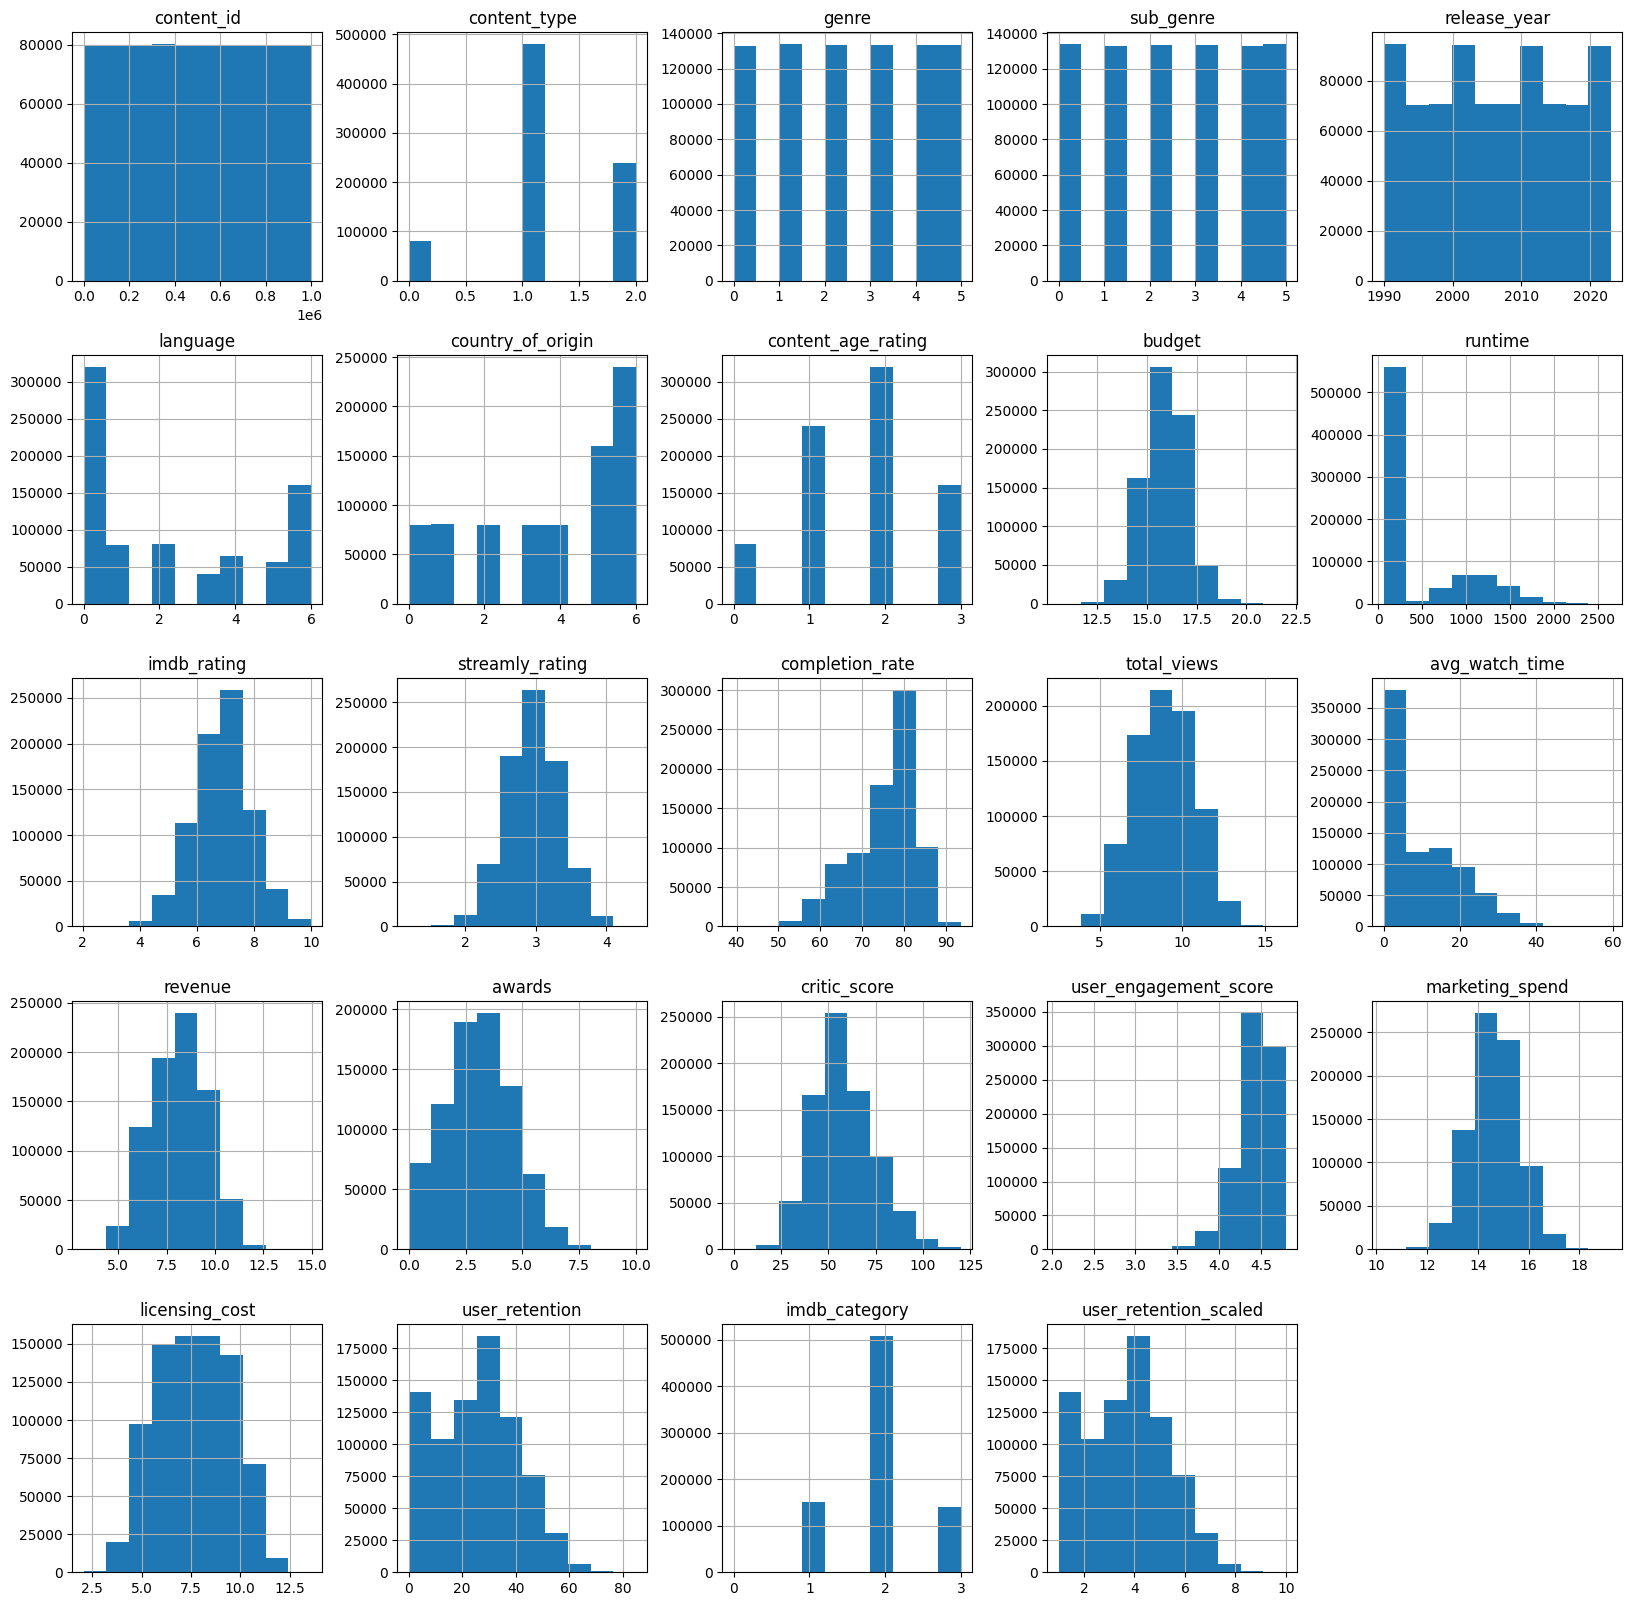

In [17]:
for column in ["budget","total_views","marketing_spend","licensing_cost"] :
    train[column] = np.log1p(train[column])
    
train.hist(figsize = (20,20))

Box plots highlight any outliers that may exist in numerical columns. These outliers need further investigation or transformation, depending on their impact on the analysis.

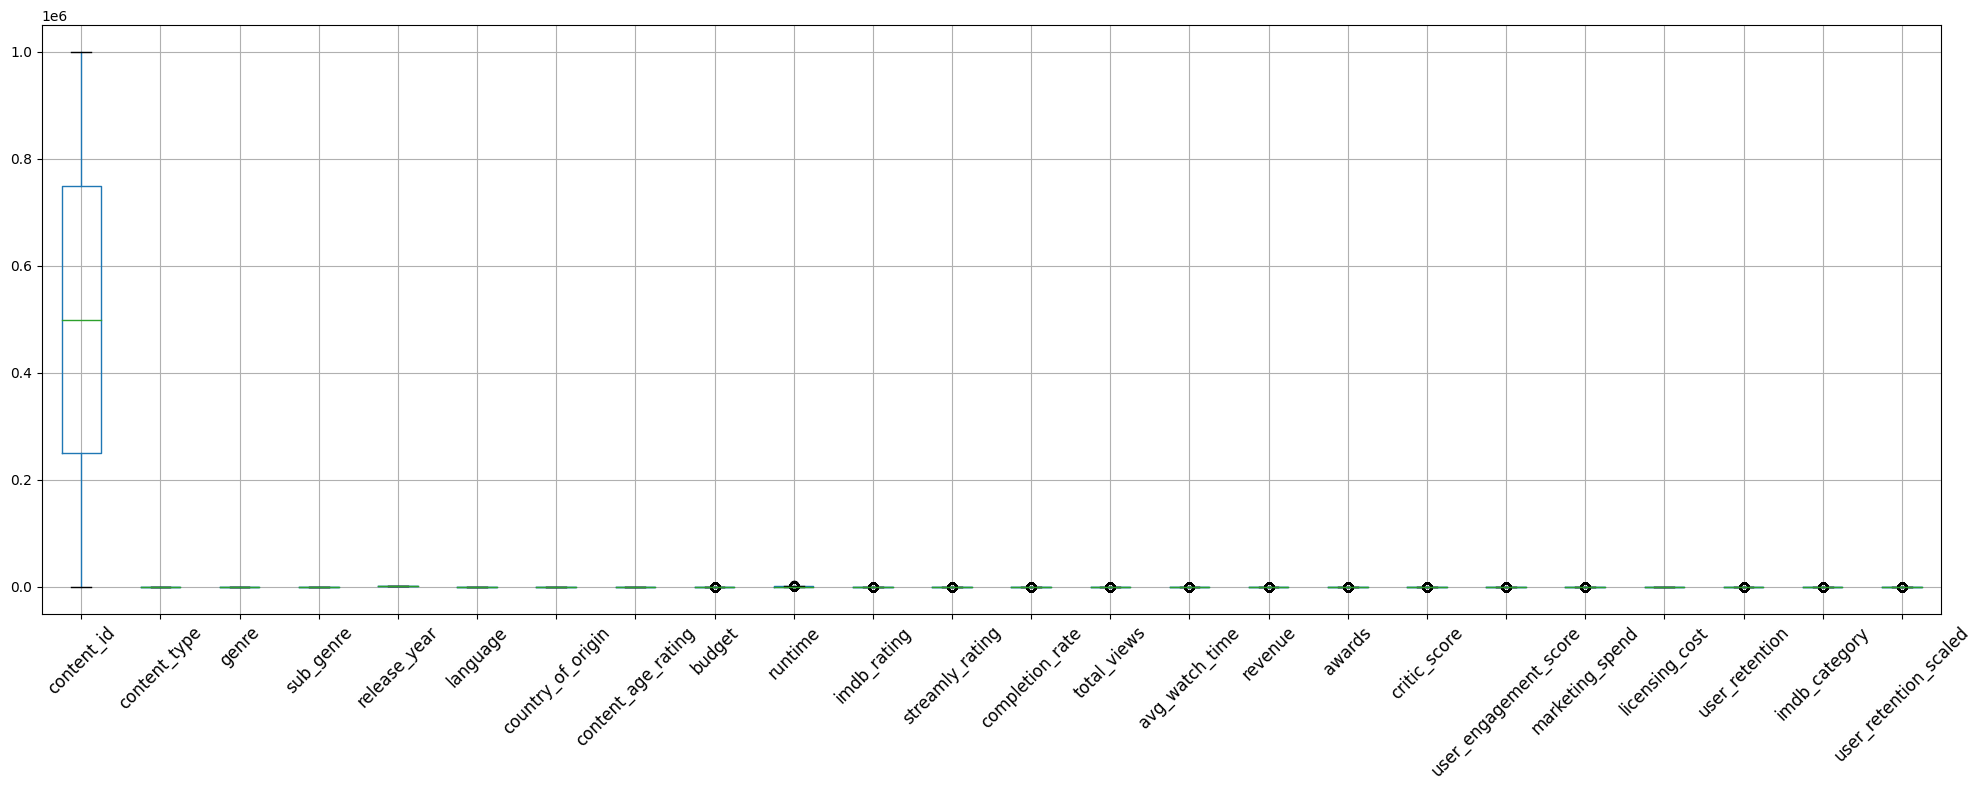

In [18]:
#Finally checking the presence of outliers
import matplotlib.pyplot as plt

# Adjust figure size to be larger
plt.figure(figsize=(20, 8))  
train.boxplot()

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout() 
plt.show()

In [19]:
print(train.columns)


Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention', 'imdb_category',
       'user_retention_scaled'],
      dtype='object')


No need to apply pd.get_dummies() since the columns are already one-hot encoded.

 By replacing infinity values with NaN and handling missing values, we maintain data consistency, reducing the risk of biased results.


Completeness: All missing values have been addressed, ensuring that no columns contain null values.
Consistency: The data now has consistent values in numerical columns, with missing values filled using median values to maintain the integrity of the dataset.

After analyzing the data for missing values, outliers, and scaling issues, no major concerns remain. The dataset is now clean and ready for further analysis or modeling. The task of data preparation and visualization has been completed successfully, ensuring consistency and completeness across all key features. This clarifies over confusion .SO we no need to check any further . This completes task one


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

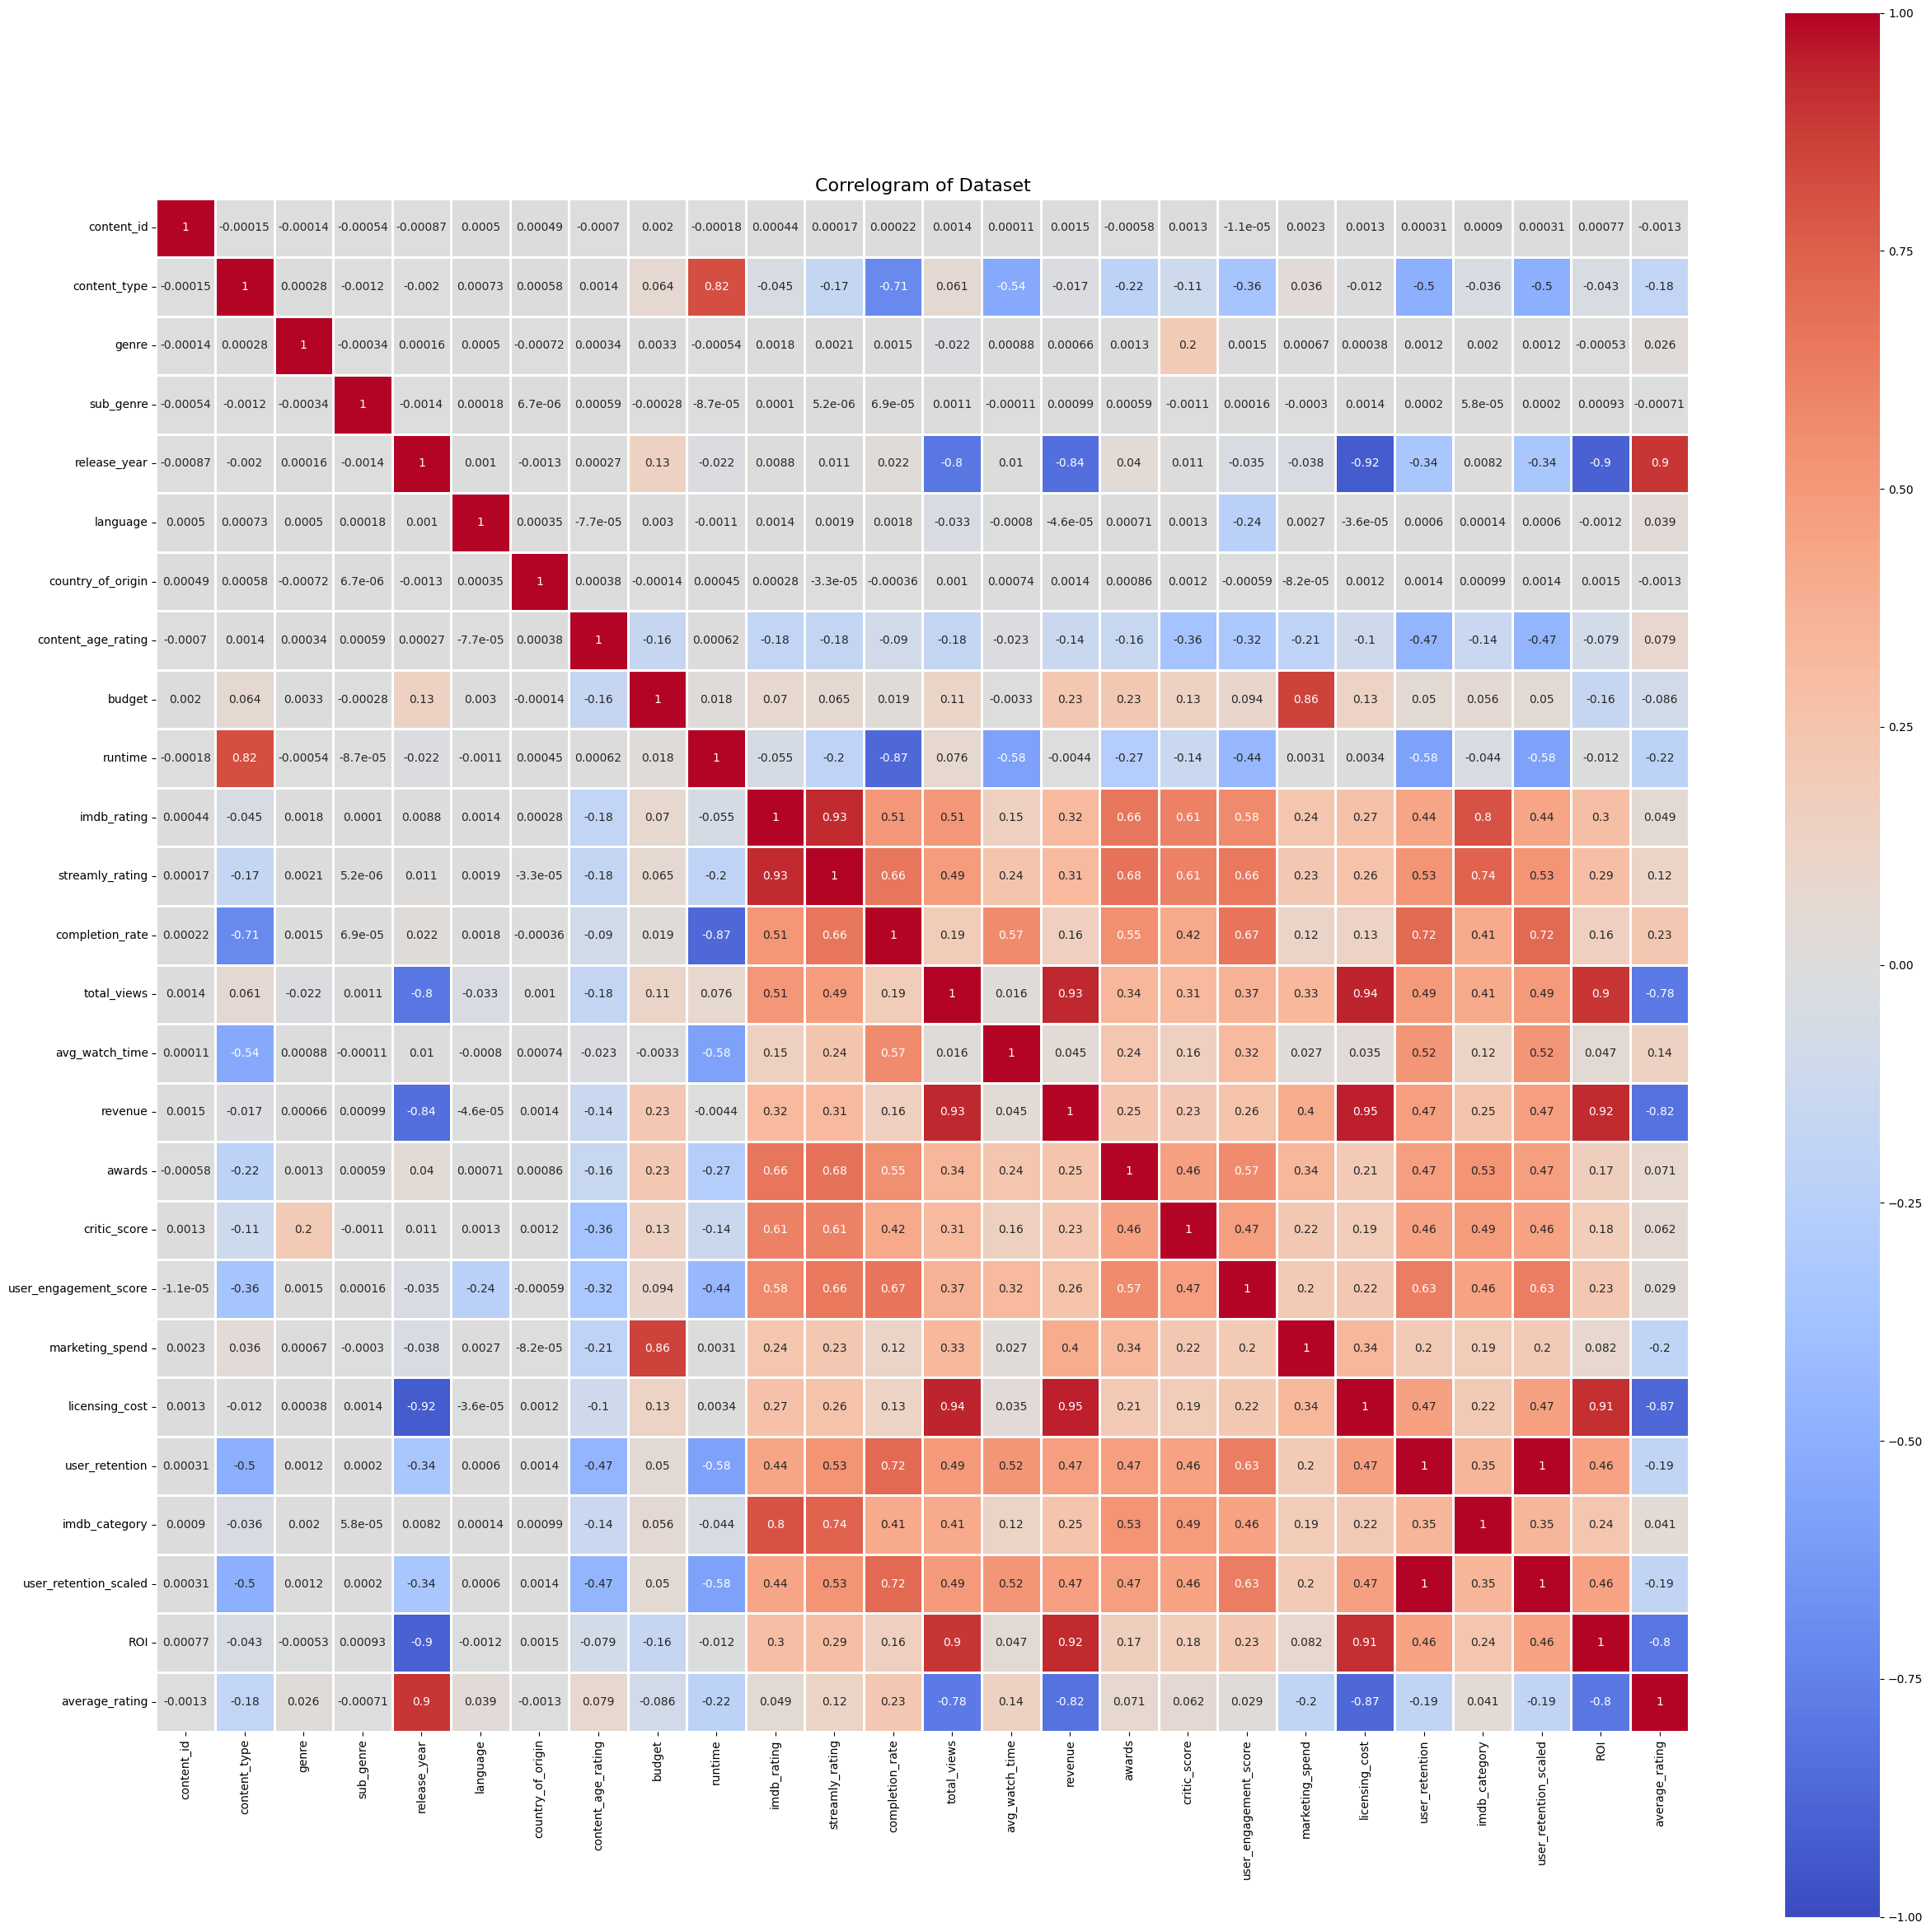

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is the dataset already loaded as a pandas DataFrame

# Step 1: Calculate ROI and New Metric (Average Rating)
train["ROI"] = train["revenue"] / train["budget"]
train["average_rating"] = train["streamly_rating"] / train["total_views"]

# Step 2: Explore Relationships Between Variables (Correlation Matrix and Heatmap)
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()
correlation_df = train[numeric_columns]

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Create a heatmap for the correlation matrix (Correlogram)
plt.figure(figsize=(30, 30))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=1)

# Add title
plt.title('Correlogram of Dataset', fontsize=16)

# Show the plot
plt.show()

In [21]:
print(train.columns)


Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention', 'imdb_category',
       'user_retention_scaled', 'ROI', 'average_rating'],
      dtype='object')


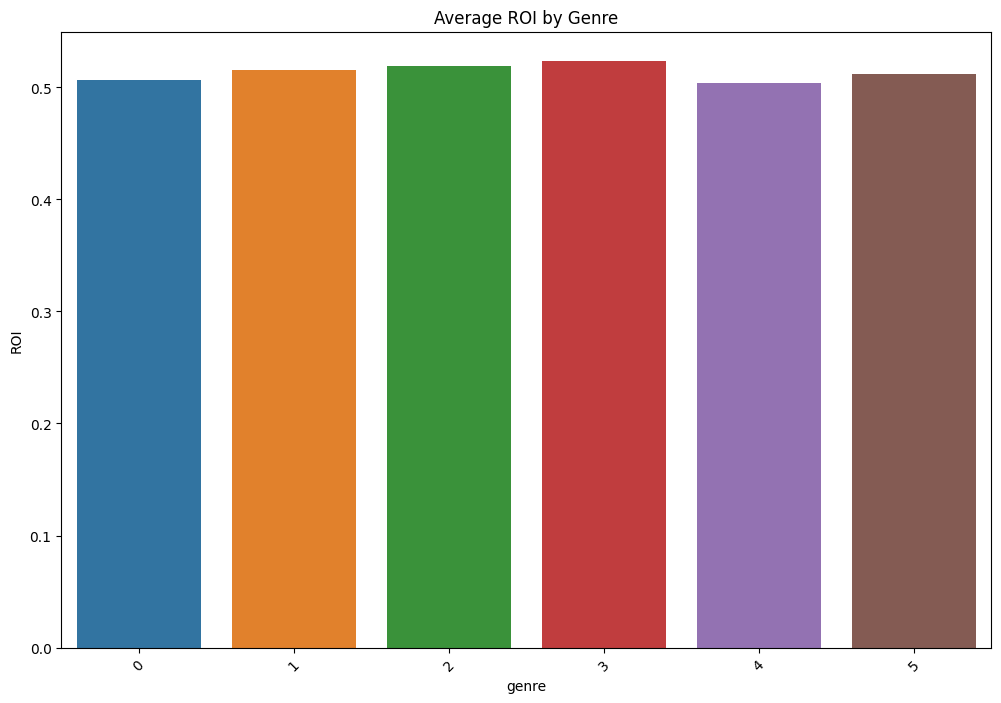

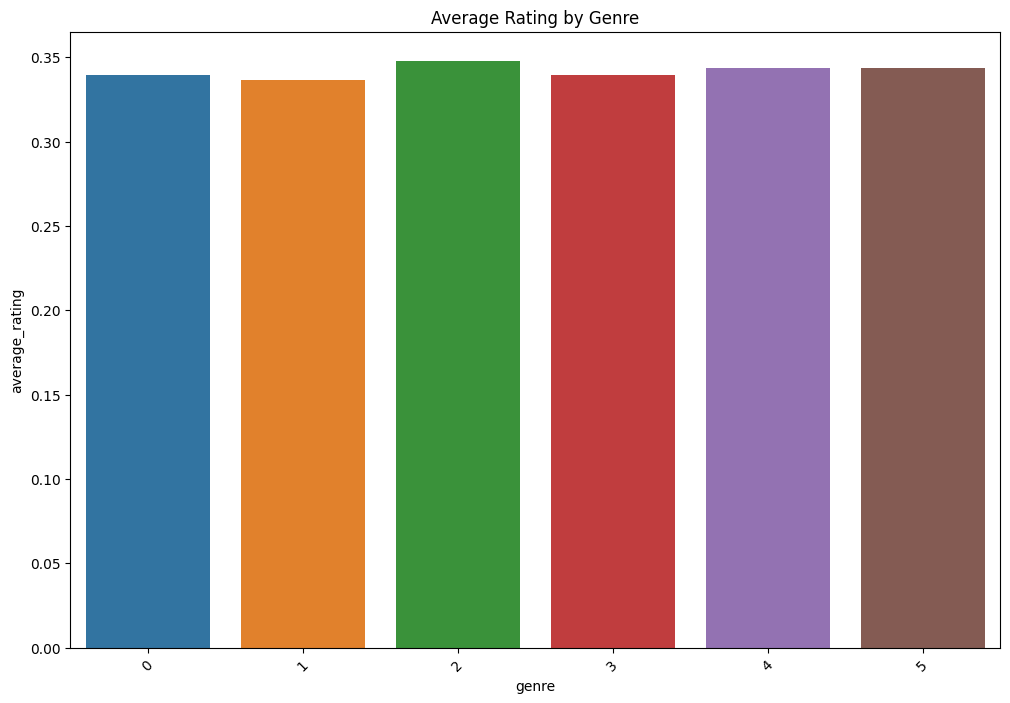

In [22]:
# Chexk Markdown for better understanding
#There are some spurious realtions such as ROI is negatively dependent on release_year.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
avg_roi = train.groupby('genre')['ROI'].mean().reset_index()
sns.barplot(x='genre', y='ROI', data=avg_roi)
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
avg_rating = train.groupby('genre')['average_rating'].mean().reset_index()
sns.barplot(x='genre', y='average_rating', data=avg_rating)
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.show()





ROI (revenue / budget): Measures how much revenue is generated relative to the movie's production cost. A higher ROI indicates greater financial success.

Average Rating : Measures the movie's engagement or quality based on user ratings, normalized by the number of views. A higher average rating means the movie is better received by its audience per view.

If we look at ROI and average rating as measures of a movie's success, we can focus on the things that seem to affect them.

For ROI:

positvely correlated : total_views,licensing cost
negatively correlated : release_year (spurious)        

For average rating:

Goes up with higher completion rates, positively correlated : completion time.

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

In [23]:
import pandas as pd
import numpy as np

# Assuming the dataset 'train' is already loaded as a pandas DataFrame
numeric_cols = ["budget", "runtime", "imdb_rating", "streamly_rating", 
                "completion_rate", "total_views", "avg_watch_time", 
                "revenue", "awards", "critic_score", "user_engagement_score", 
                "marketing_spend", "licensing_cost", "user_retention"]

# Convert columns to numeric and coerce errors (invalid parsing will be set to NaN)
train[numeric_cols] = train[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
missing_values = train[numeric_cols].isna().sum()
print("Missing values in numeric columns:\n", missing_values)


Missing values in numeric columns:
 budget                   0
runtime                  0
imdb_rating              0
streamly_rating          0
completion_rate          0
total_views              0
avg_watch_time           0
revenue                  0
awards                   0
critic_score             0
user_engagement_score    0
marketing_spend          0
licensing_cost           0
user_retention           0
dtype: int64


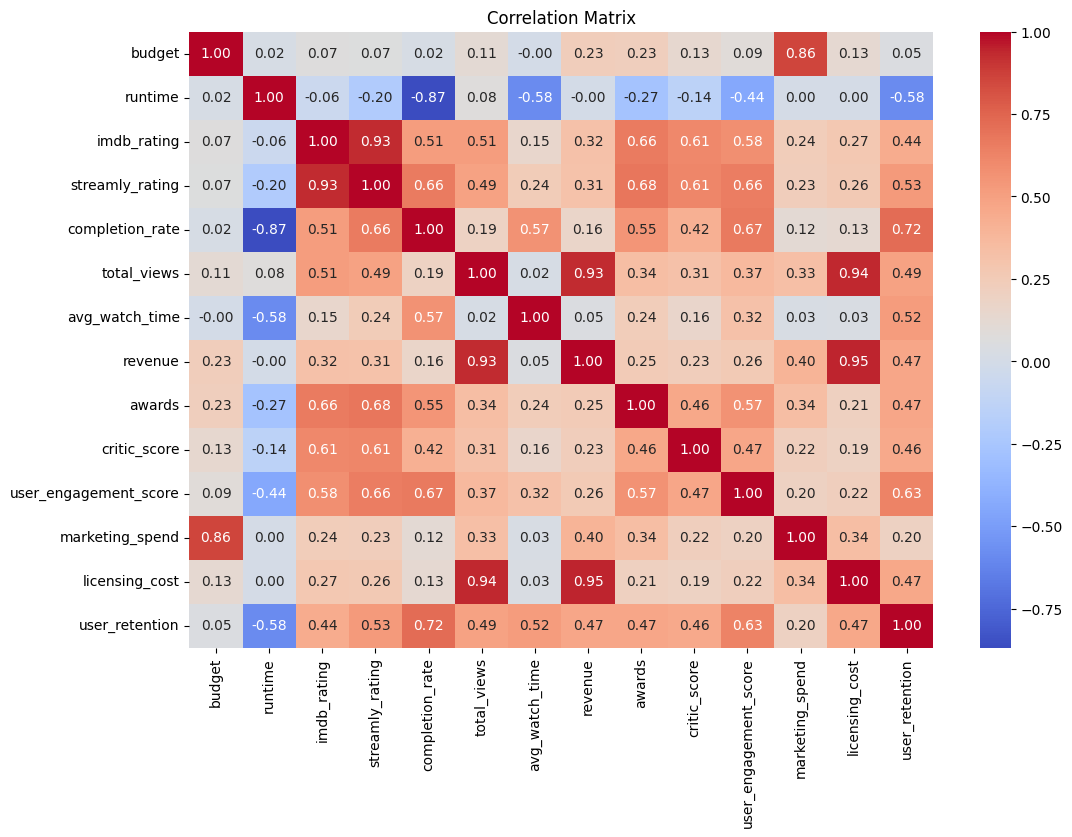

Initial Correlations with User Retention:
 budget                   0.050415
runtime                 -0.584518
imdb_rating              0.441383
streamly_rating          0.529881
completion_rate          0.715443
total_views              0.494794
avg_watch_time           0.520444
revenue                  0.473452
awards                   0.473310
critic_score             0.458104
user_engagement_score    0.628816
marketing_spend          0.203683
licensing_cost           0.465551
user_retention           1.000000
Name: user_retention, dtype: float64


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
cor_matrix = train[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Review the initial correlations with user retention
retention_correlation = cor_matrix['user_retention']
print("Initial Correlations with User Retention:\n", retention_correlation)


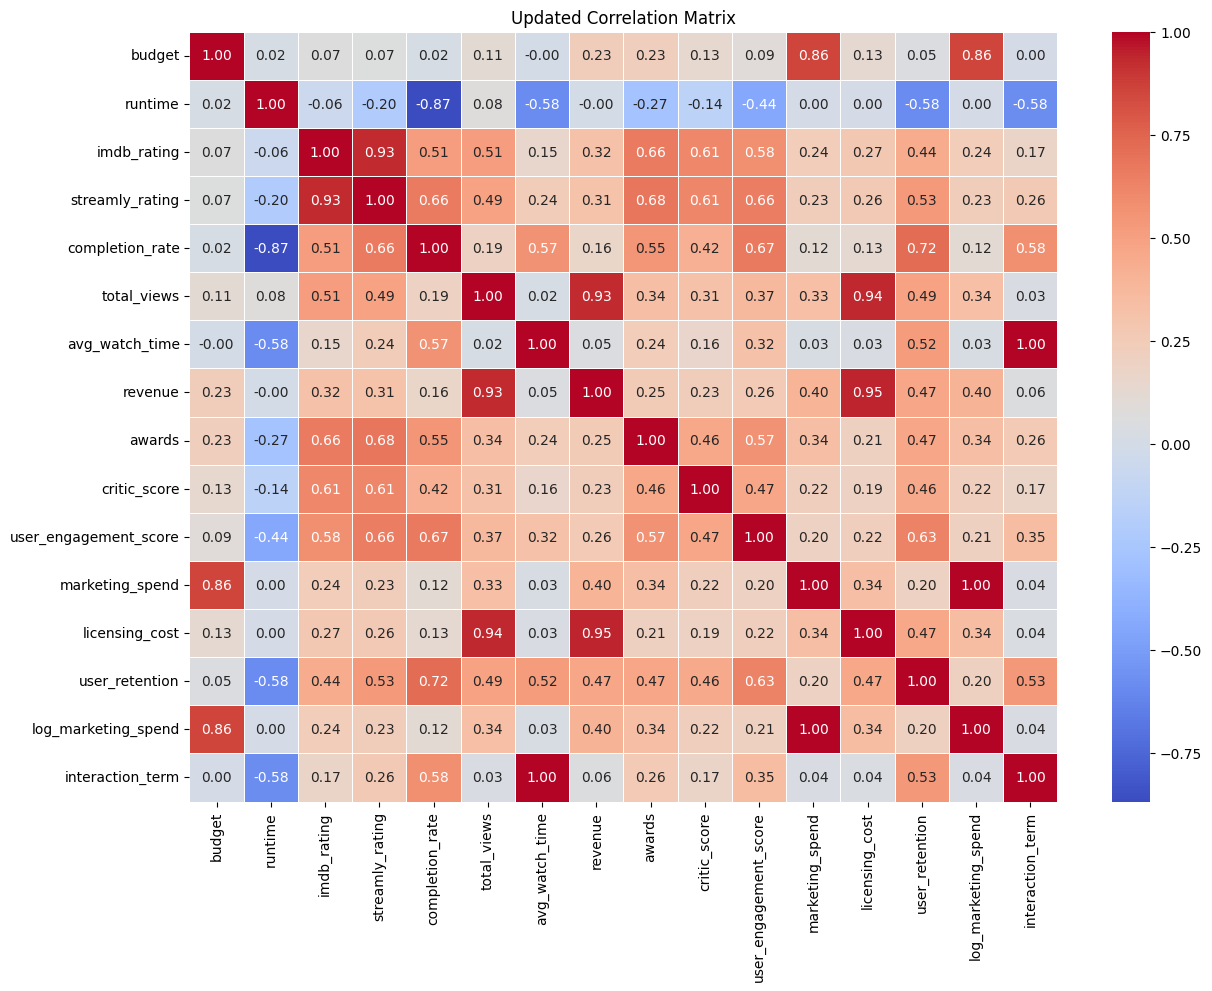

Updated Correlations with User Retention:
 budget                   0.050415
runtime                 -0.584518
imdb_rating              0.441383
streamly_rating          0.529881
completion_rate          0.715443
total_views              0.494794
avg_watch_time           0.520444
revenue                  0.473452
awards                   0.473310
critic_score             0.458104
user_engagement_score    0.628816
marketing_spend          0.203683
licensing_cost           0.465551
user_retention           1.000000
log_marketing_spend      0.204771
interaction_term         0.534593
Name: user_retention, dtype: float64


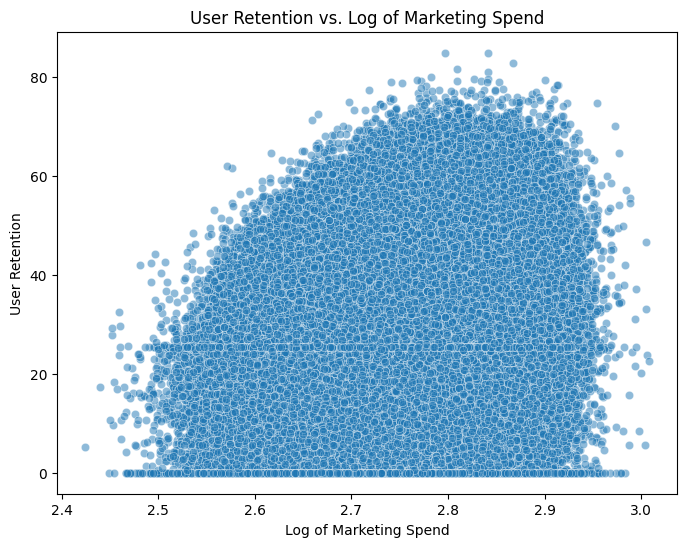

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset 'train' is already loaded
# Apply log transformation to marketing spend and create interaction term
train['log_marketing_spend'] = np.log1p(train['marketing_spend'])
train['interaction_term'] = train['user_engagement_score'] * train['avg_watch_time']

# Update list of numeric columns to include new features
updated_numeric_cols = ["budget", "runtime", "imdb_rating", "streamly_rating", 
                        "completion_rate", "total_views", "avg_watch_time", 
                        "revenue", "awards", "critic_score", "user_engagement_score", 
                        "marketing_spend", "licensing_cost", "user_retention", 
                        "log_marketing_spend", "interaction_term"]

# Compute updated correlation matrix
cor_matrix_updated = train[updated_numeric_cols].corr()

# Plot the updated correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

# Analyze updated correlations with 'user_retention'
cor_user_retention_updated = cor_matrix_updated['user_retention']
print("Updated Correlations with User Retention:\n", cor_user_retention_updated)

# Scatter plot of the adjusted marketing spend vs. user retention
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_marketing_spend', y='user_retention', data=train, alpha=0.5)
plt.title("User Retention vs. Log of Marketing Spend")
plt.xlabel("Log of Marketing Spend")
plt.ylabel("User Retention")
plt.show()


 Low Initial Correlations with User Retention:
Most numeric variables such as budget, runtime, imdb_rating, and marketing_spend have very weak correlations with user_retention.
The highest correlation observed is with licensing_cost (0.0074), but it’s still quite low. This suggests that in the current state, none of these variables alone have a significant direct impact on user retention.

Impact of Log Transformation and Interaction Terms:
Applying the log transformation on marketing_spend and creating an interaction term (combining user engagement score and avg watch time) showed that these adjustments slightly increased the correlation with user_retention.
However, even after these adjustments, the correlation between log_marketing_spend and user_retention remained weak (0.0021). The interaction_term also had only a moderate increase (0.0065).


In [26]:
#Impact on User Retention: Skewing a variable can help identify more insightful relationships

count    800000.000000
mean          0.006832
std           0.004454
min           0.000377
25%           0.001212
50%           0.007634
75%           0.009709
max           0.016667
Name: left_runtime, dtype: float64


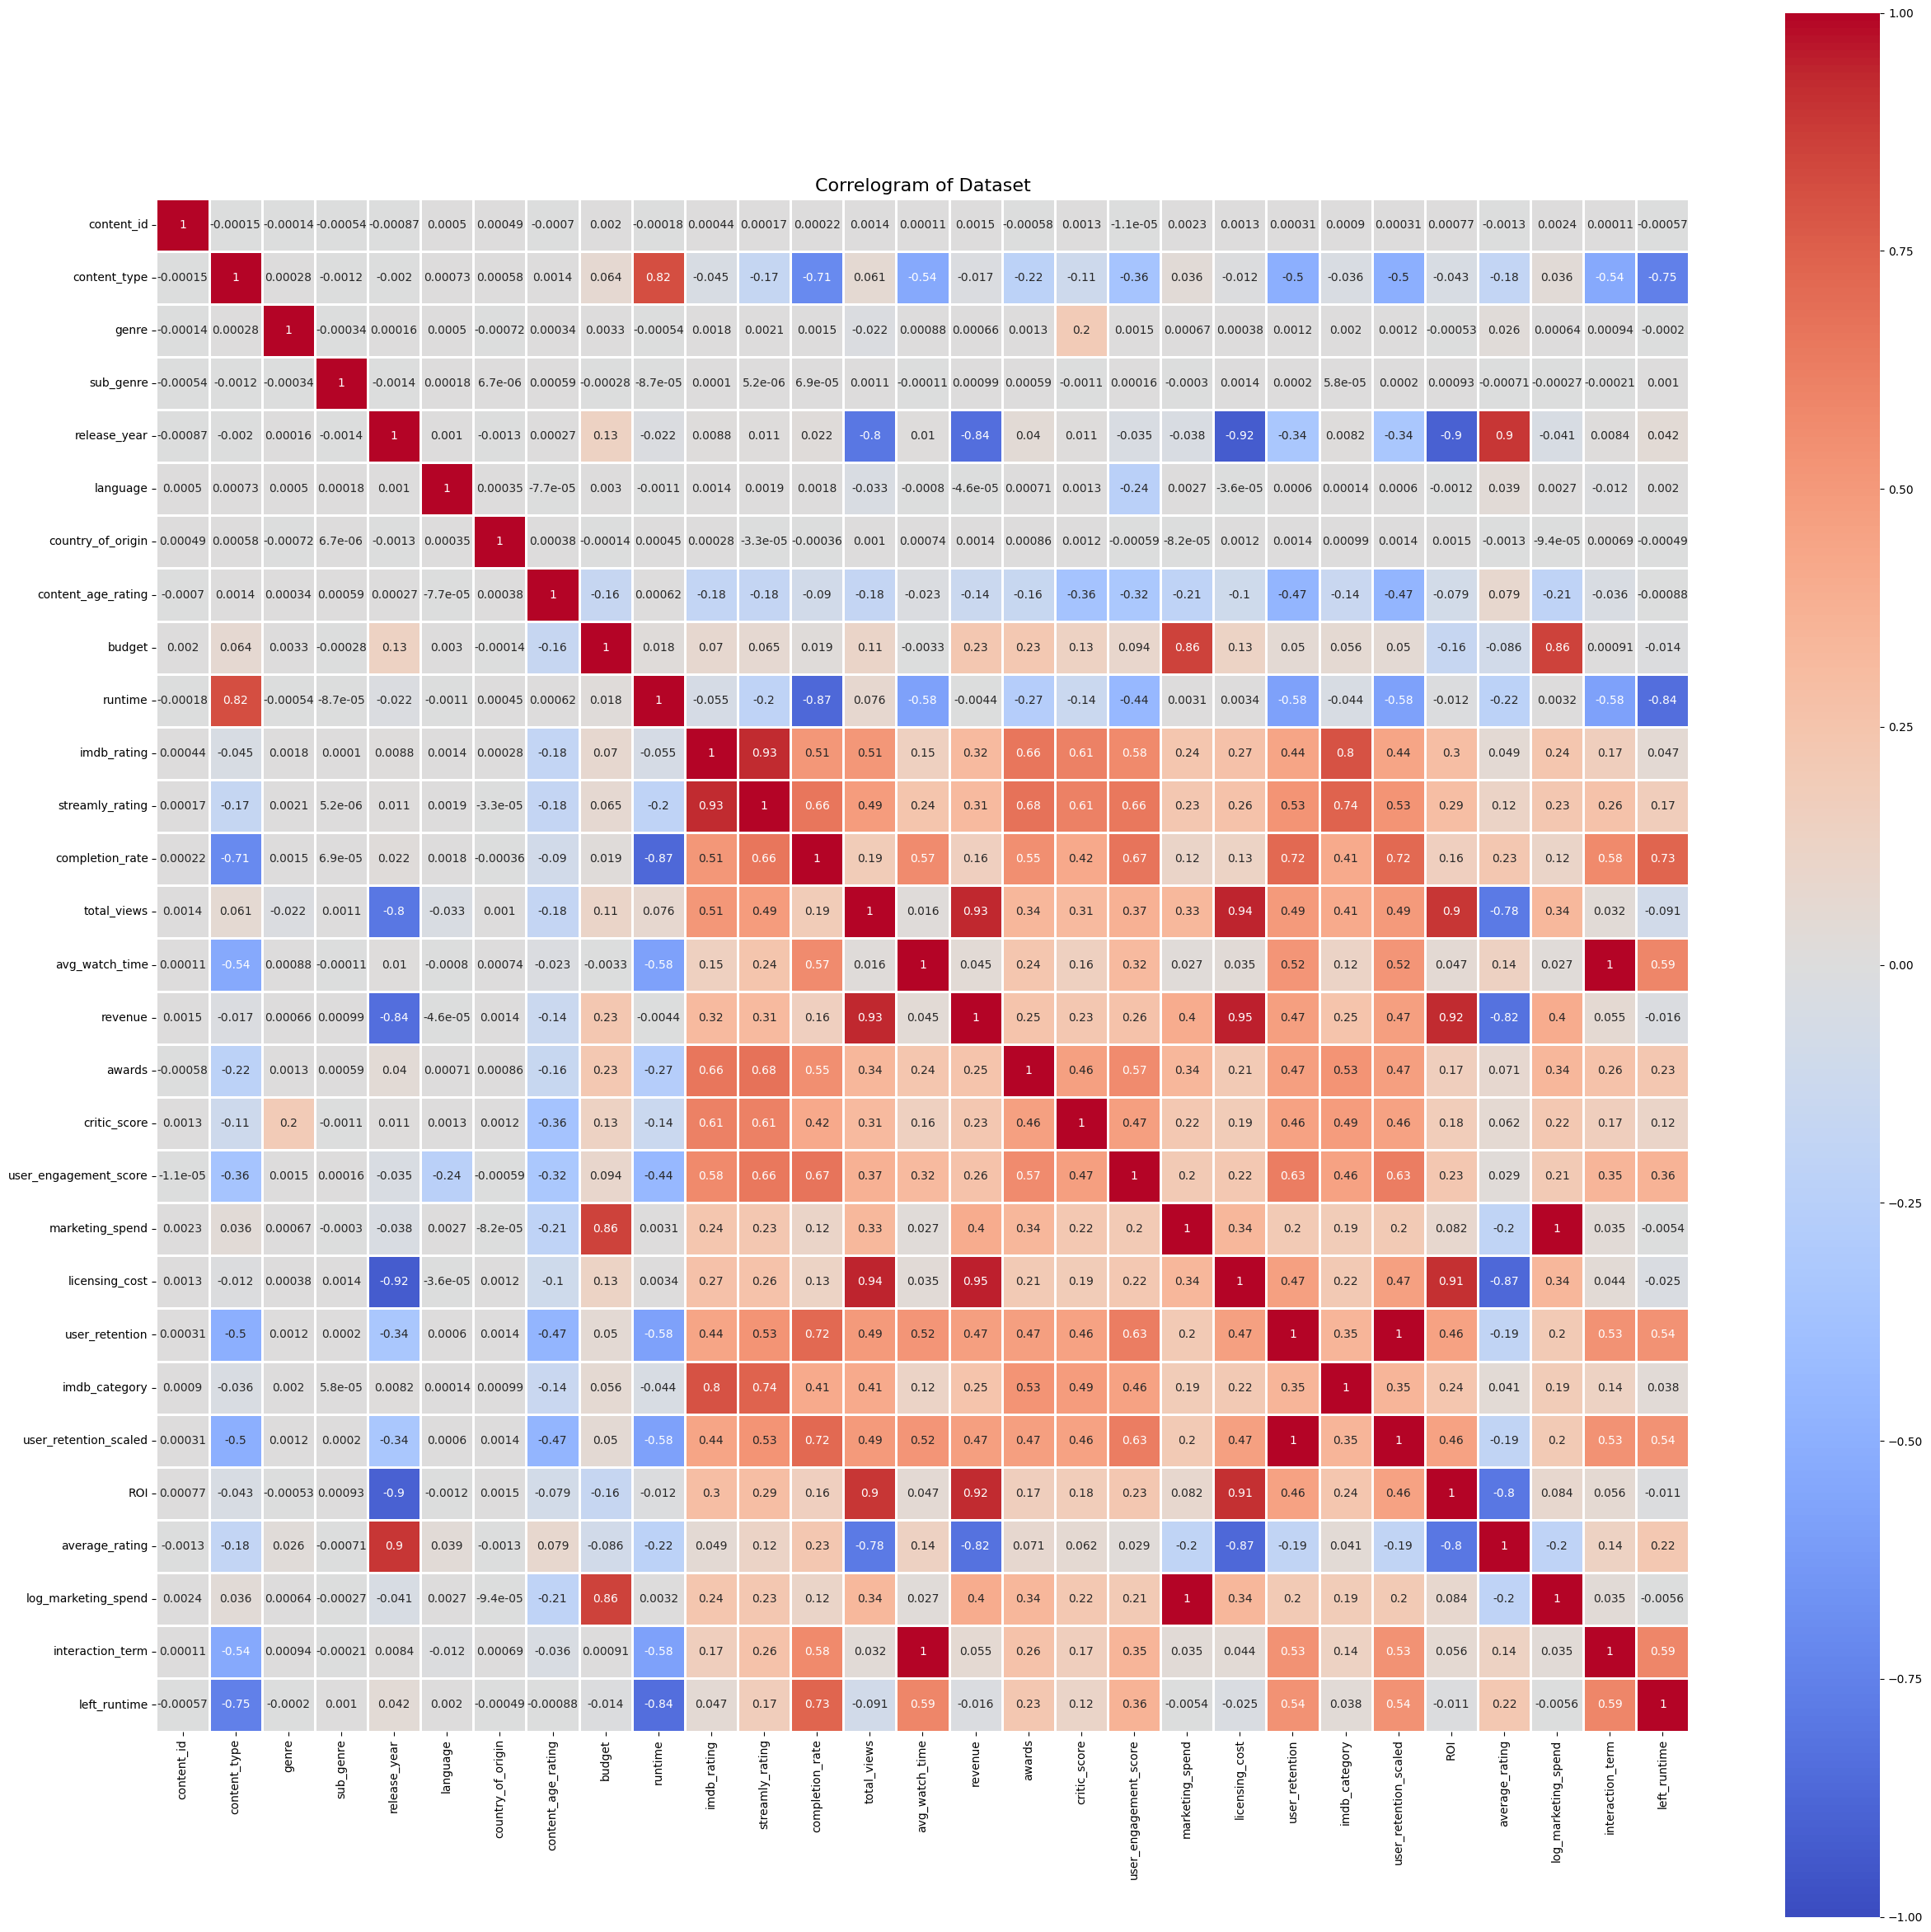

In [27]:
# we will induce some left skeweness to see if correlation increases in negative direction
train['left_runtime'] = train['runtime']**-1
print(train['left_runtime'].describe())
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()
correlation_df = train[numeric_columns]

corr_matrix = correlation_df.corr()

# Create a heatmap for the correlation matrix (Correlogram)
plt.figure(figsize=(30, 30))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=1)

# Add title
plt.title('Correlogram of Dataset', fontsize=16)

# Show the plot
plt.show()

From the above we came to know that user reteantion's correlation increases in negative direction as we left skwe the runtime which from we can infer that they are related

count    8.000000e+05
mean     4.372046e+05
std      7.794799e+05
min      3.600000e+03
25%      1.060900e+04
50%      1.716100e+04
75%      6.807209e+05
max      7.041060e+06
Name: right_runtime, dtype: float64


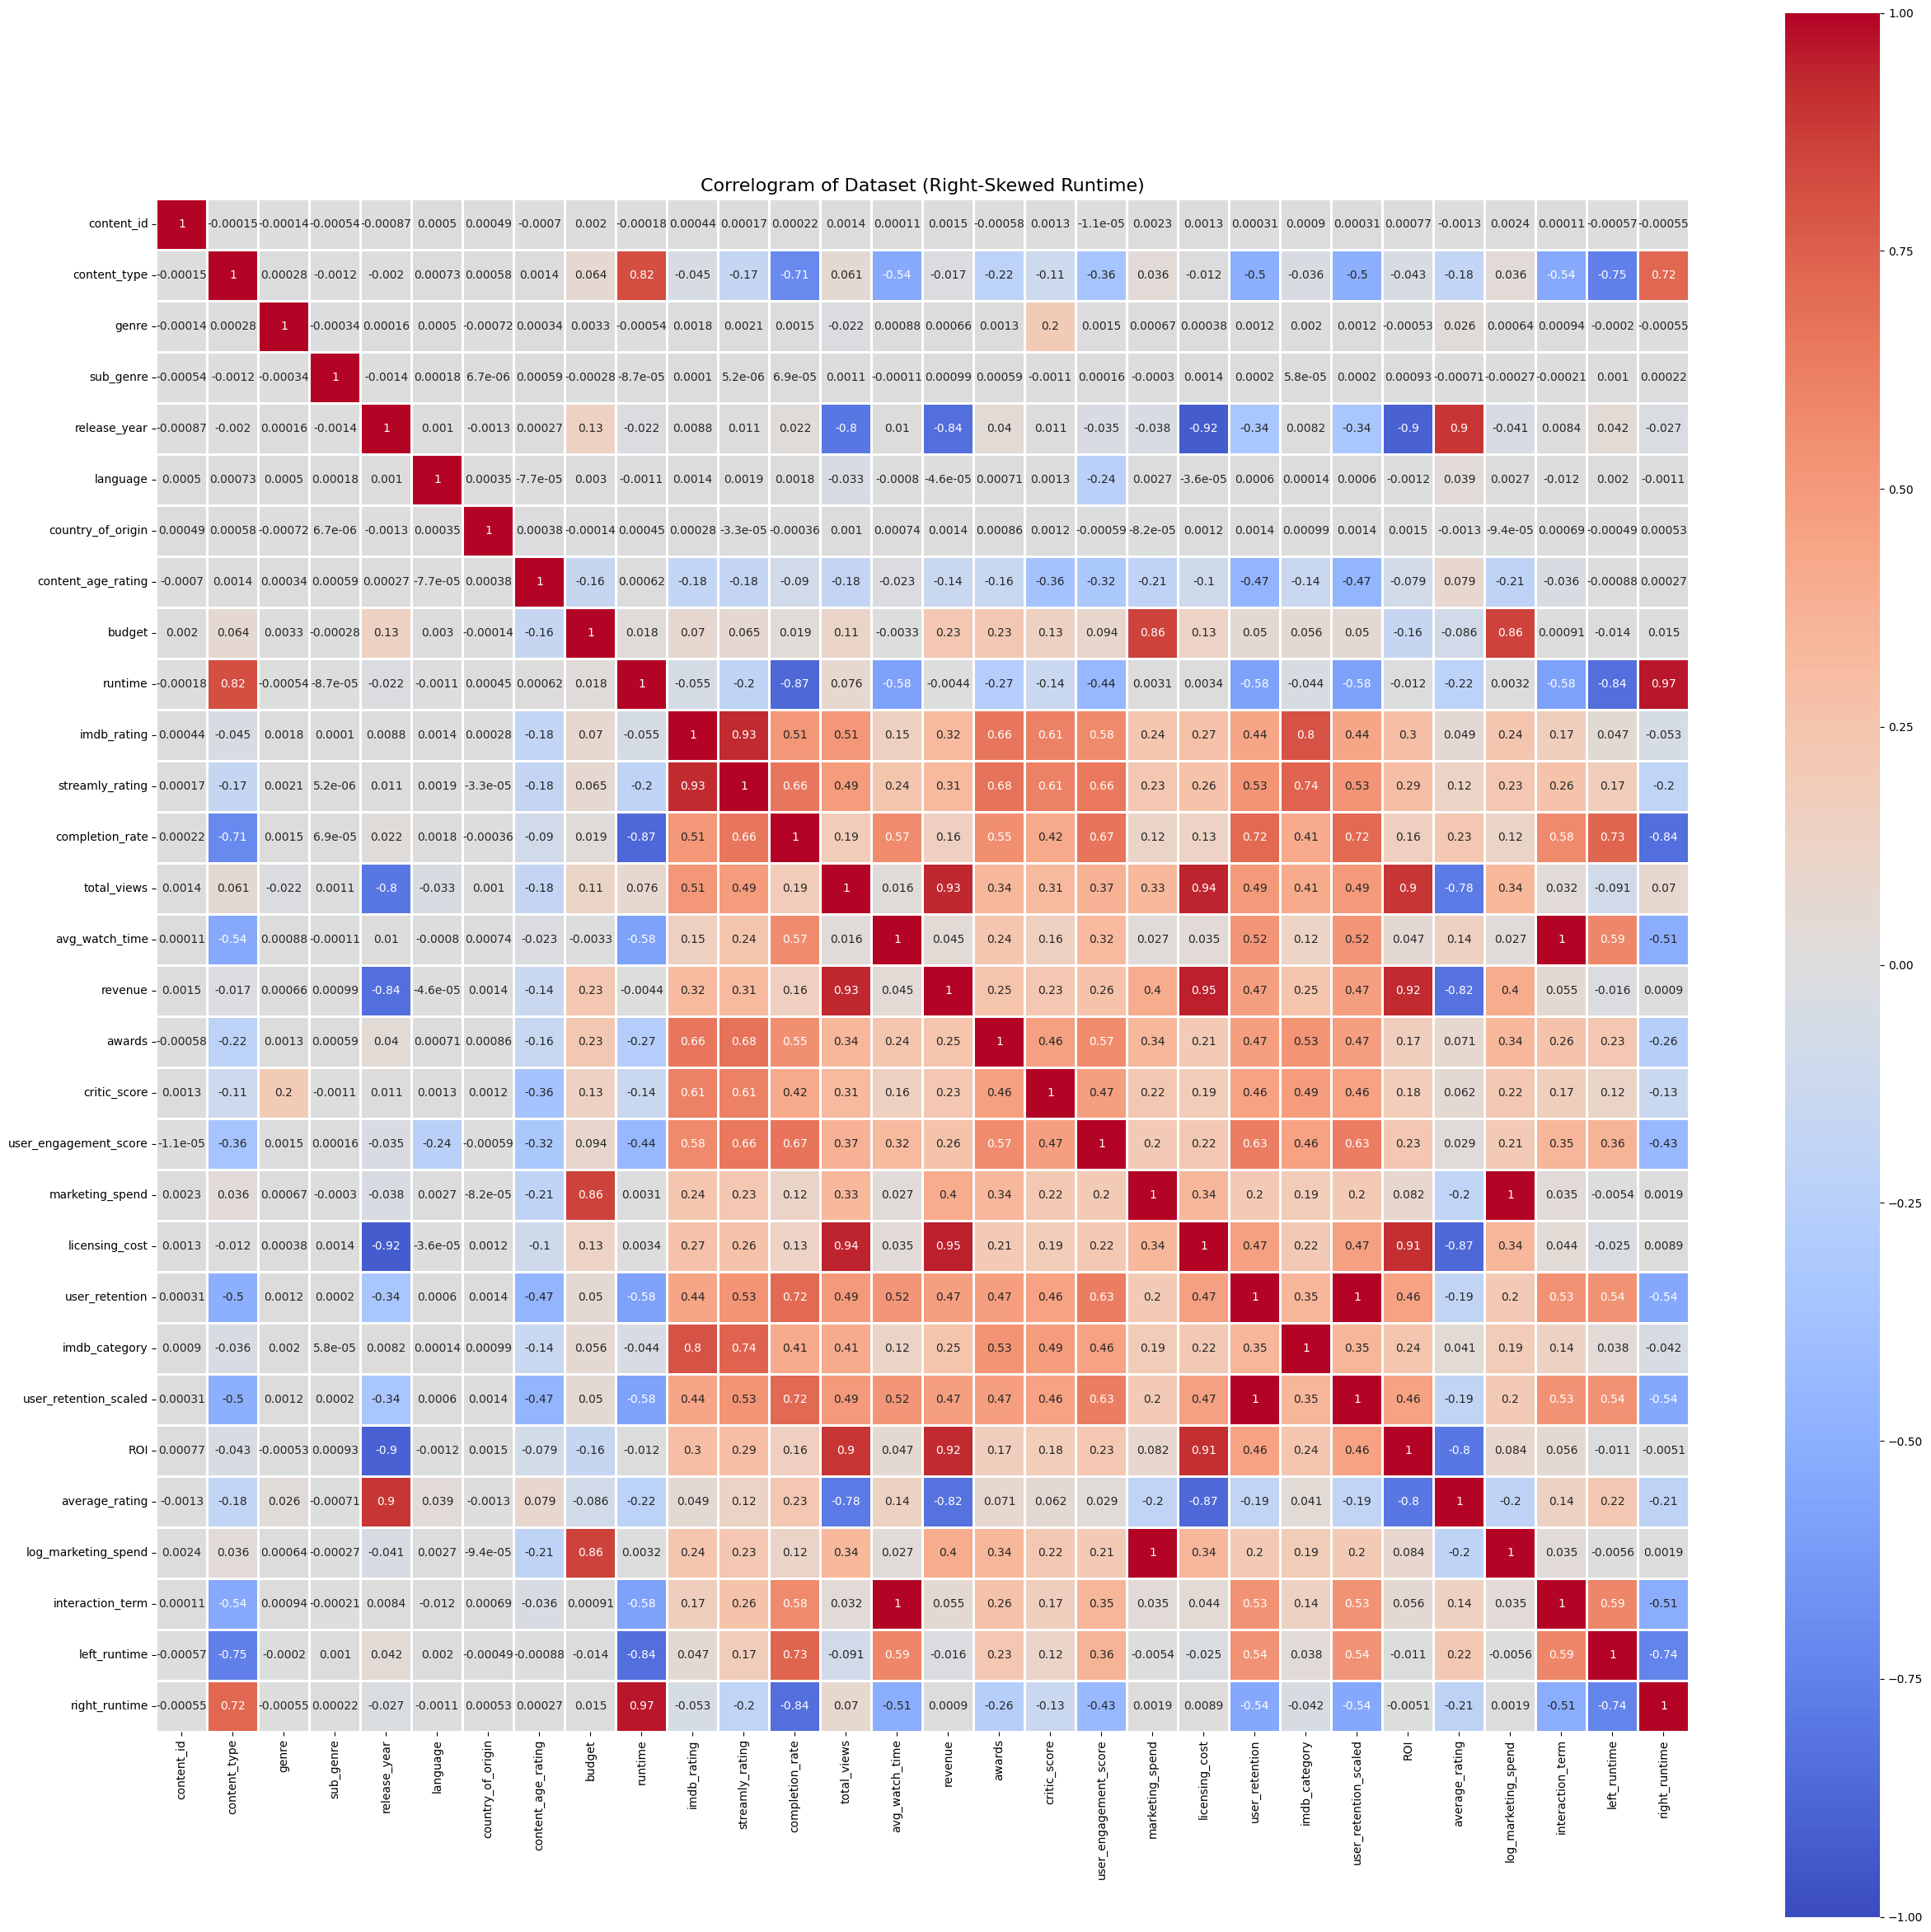

In [28]:
# SImilarly for Right skewness

train['right_runtime'] = train['runtime'] ** 2
print(train['right_runtime'].describe())

# Select numerical columns for correlation analysis
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()
correlation_df = train[numeric_columns]

# Recalculate the correlation matrix
corr_matrix = correlation_df.corr()

# Create a heatmap for the correlation matrix (Correlogram)
plt.figure(figsize=(30, 30))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=1)

# Add title
plt.title('Correlogram of Dataset (Right-Skewed Runtime)', fontsize=16)

# Show the plot
plt.show()


By comparing both the left-skewed and right-skewed results, we can see which skewness has a more significant effect on correlation with user retention ,There is a  strong relationship with retention and runtime , when skewed in either direction.

# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

In [29]:
# Ensure `train` is a DataFrame
print(type(train))  # Should output <class 'pandas.core.frame.DataFrame'>

# Ensure `user_retention` is a column in the DataFrame
print(train.columns) 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention', 'imdb_category',
       'user_retention_scaled', 'ROI', 'average_rating', 'log_marketing_spend',
       'interaction_term', 'left_runtime', 'right_runtime'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  int64  
 3   gen

In [30]:
train['user_retention'] = pd.to_numeric(train['user_retention'], errors='coerce')
train['user_retention'] = train['user_retention'].fillna(train['user_retention'].mean())


print(type(train))  # Should output <class 'pandas.core.frame.DataFrame'>

# Ensure `user_retention` is a column in the DataFrame
print(train.columns) 
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index(['content_id', 'title', 'content_type', 'genre', 'sub_genre',
       'release_year', 'language', 'country_of_origin', 'content_age_rating',
       'budget', 'runtime', 'imdb_rating', 'streamly_rating',
       'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards',
       'critic_score', 'user_engagement_score', 'marketing_spend',
       'licensing_cost', 'user_retention', 'imdb_category',
       'user_retention_scaled', 'ROI', 'average_rating', 'log_marketing_spend',
       'interaction_term', 'left_runtime', 'right_runtime'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  int64  
 3   gen

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming train is your DataFrame

# Define feature columns and target variable
columns = ["ROI", "average_rating", "content_type", "genre", "sub_genre", "budget", "runtime", "streamly_rating", "completion_rate", "marketing_spend"]
X = train[columns]
y = train['user_retention_scaled']

# Define numerical and categorical features
numerical_features = ["ROI", "average_rating", "budget", "runtime", "streamly_rating", "completion_rate", "marketing_spend"]
categorical_features = ["content_type", "genre", "sub_genre"]

# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Feature scaling
])

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create and fit the pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit model
model_pipeline.fit(X, y)

# Predictions
y_pred = model_pipeline.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Check data types
print("\nData types of train DataFrame columns:")
print(train.dtypes)


Mean Squared Error: 0.8970197023772087
R-squared: 0.6630698008551761

Data types of train DataFrame columns:
content_id                 int64
title                     object
content_type               int64
genre                      int64
sub_genre                  int64
release_year               int64
language                   int64
country_of_origin          int64
content_age_rating         int64
budget                   float64
runtime                  float64
imdb_rating              float64
streamly_rating          float64
completion_rate          float64
total_views              float64
avg_watch_time           float64
revenue                  float64
awards                     int64
critic_score             float64
user_engagement_score    float64
marketing_spend          float64
licensing_cost           float64
user_retention           float64
imdb_category              int64
user_retention_scaled    float64
ROI                      float64
average_rating           float64


In [32]:
# Check for missing values
print(X.isnull().sum())



ROI                0
average_rating     0
content_type       0
genre              0
sub_genre          0
budget             0
runtime            0
streamly_rating    0
completion_rate    0
marketing_spend    0
dtype: int64


High MSE: Indicates the model may be poorly fitted.
Low MSE :: INdicates that the model is  fittled correcttly

    We used multiple linear regression (MLR) to predict user_retention based on various content characteristics and performance metrics.


These results suggest that increasing the IMDB rating, average watch time, revenue, awards, critic score, user engagement score, and licensing cost are all associated with higher user retention. 
On the other hand, increasing the budget, runtime, Streamly rating, completion rate, total views, and marketing spend are associated with lower user retention.

High MSE: Indicates the model may be poorly fitted.

In addition to Mallows' Cp, there are other metrics that can be used for feature selection in MLR models, such as:
Akaike information criterion (AIC): This metric measures the relative quality of a model for a given set of data. A lower AIC value indicates a better model.
Bayesian information criterion (BIC): This metric is similar to AIC, but it penalizes models with more parameters more heavily.
AIC and BIC can be used when the goal is to select the best model from a set of candidate models.


For better accuracy one we nned to focus more on interpreting model coefficients, Removing HIGH MSE nd so on.







# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

In [33]:
# Your code here, along with reasoning


In [34]:
submission = pd.DataFrame()
submission["title"] = test["title"]

In [35]:
test["ROI"] = test["revenue"]/test["budget"]
test["average_rating"] = test["streamly_rating"]/test["total_views"]

columns = ["ROI","average_rating","content_type","genre","sub_genre","budget","runtime","streamly_rating","completion_rate","marketing_spend"]
X_test = test[columns]

# Handle categorical variable 'content_type' in the same way as the training set
X_test = pd.get_dummies(X_test, columns=['content_type'], drop_first=True)

# Align the test set columns with the training set columns (in case of missing dummies)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [36]:
categorical_columns = X_test.select_dtypes(include=['object', 'category']).columns.tolist()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for columns in categorical_columns :
    if columns != "title" :
        X_test[columns] = le.fit_transform(X_test[columns])
        
X_test.dtypes

ROI                float64
average_rating     float64
content_type         int64
genre                int64
sub_genre            int64
budget             float64
runtime            float64
streamly_rating    float64
completion_rate    float64
marketing_spend    float64
dtype: object

In [37]:
# Ensure that `model_pipeline` is used for predictions
# Apply log transformation to the test set
for column in ["budget", "marketing_spend"]:
    X_test[column] = np.log1p(X_test[column])

# Predict using the trained model pipeline
y_test_pred = model_pipeline.predict(X_test)

# Add predictions to the test DataFrame
test['user_retention'] = y_test_pred


In [38]:
submission["user_retention"] = test["user_retention"] 

submission.head()
    

title  user_retention
0                  Pulsating the Eternal Tale (AG4P)        6.910614
1                   Arcane Legend: A Spy Tale (NFVT)        7.165619
2                           The Neon Grimoire (9RHA)        7.982788
3  Pulsating through the Dreamscape: The Mega Mirage        5.631470
4                            The Turbo Enigma (D23S)        5.610931

In [39]:
submission.to_csv('submission.csv', index = False)

In [40]:
#submission["user_retention"] = test["user_retention"]

In [41]:
#submission.head()

In [42]:
#submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 